## PYMC Laboratory

Welcome to the **PyMC Laboratory**. In this lab, we will explore the foundations and practical applications of **Bayesian inference** using the [PyMC](https://www.pymc.io/) probabilistic programming library in Python.

### 🔍 Objective

The goal of this laboratory is to understand how to:

- Define probabilistic models using Bayesian reasoning
- Assign prior distributions to parameters
- Incorporate observed data through likelihood functions
- Use **Markov Chain Monte Carlo (MCMC)** to approximate posterior distributions
- Evaluate convergence and diagnose sampling performance using **ArviZ**

### 🧪 What You'll Do

Throughout the lab, you will:

1. Implement simple Bayesian models (e.g. Beta-Binomial and Linear Regression)
2. Visualize model structure using `pm.model_to_graphviz()`
3. Sample from the posterior distribution using `pm.sample()`
4. Use ArviZ to:
   - Plot trace and posterior distributions
   - Calculate diagnostics such as R̂ (R-hat) and Effective Sample Size (ESS)
   - Visualize Highest Density Intervals (HDI)
   - Check for divergences and sampling quality

### 📦 Requirements

Make sure you have the following Python libraries installed:

```bash
conda install -c conda-forge pymc arviz matplotlib graphviz


## 🔗 Why Are Chains Important in MCMC?

When using **Markov Chain Monte Carlo (MCMC)** to approximate posterior distributions, we rely on a process that generates samples from the posterior through **random walks** — these are called **chains**.

Each chain is an independent simulation that explores the posterior space. Running multiple chains is a critical part of ensuring that your inference is both accurate and reliable.

---

### 🎯 What Is a Chain?

- A **chain** is a sequence of values generated by the sampler.
- It starts from a random initial value and gradually **converges** toward the target distribution.
- After a warm-up (or "burn-in") period, the chain should be sampling from the **true posterior**.

---

### 🔍 Why Run Multiple Chains?

Running multiple chains allows you to:

- **Assess convergence**: If all chains converge to the same distribution, we can be confident that we’ve found the correct posterior.
- **Avoid false confidence**: A single chain might get stuck in a local mode or not explore the space properly.
- **Use diagnostic tools**: Metrics like **R-hat ($\hat{R}$)** compare between-chain and within-chain variance to determine if convergence has been reached.

---

### ✅ Good Chain Behavior

- Chains **should mix well**: they should move freely across the posterior space.
- The **trace plots** of different chains should overlap and show similar patterns.
- The **R-hat statistic** should be close to **1.0** for all parameters.

---

### ⚠️ Warning Signs of Bad Chains

- Chains don’t overlap in the trace plot → might indicate convergence failure.
- R-hat > 1.01 → the chains haven’t converged.
- Very low effective sample size → chains are highly autocorrelated.

---

### 📌 Summary

| Concept            | Why it matters                          |
|--------------------|------------------------------------------|
| Multiple chains    | Increases confidence in posterior accuracy |
| Chain convergence  | Essential for valid inference             |
| Chain diagnostics  | Help detect sampling problems             |

Using **multiple chains** is not just a technical detail — it's a core part of trustworthy Bayesian modeling.



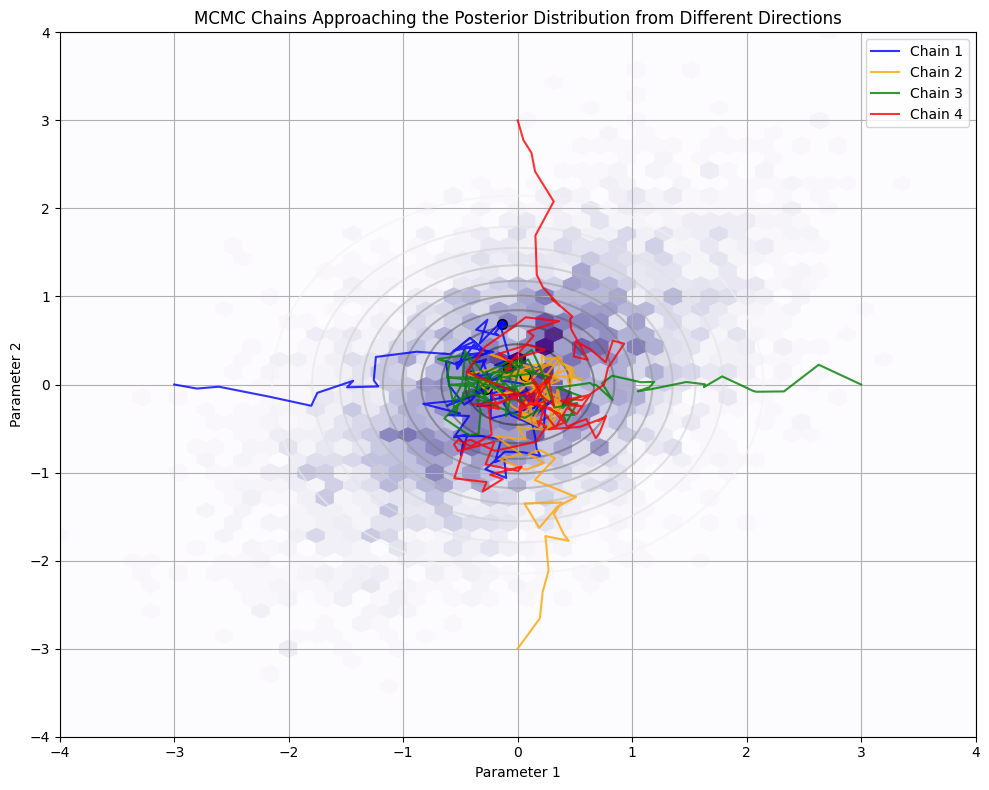

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define the posterior distribution (a 2D Gaussian)
mean = np.array([0, 0])
cov = np.array([[1, 0.5], [0.5, 1]])
x, y = np.random.multivariate_normal(mean, cov, 5000).T

# Simulate 4 chains starting from different directions
n_steps = 100
colors = ['blue', 'orange', 'green', 'red']
starts = [np.array([-3, 0]), np.array([0, -3]), np.array([3, 0]), np.array([0, 3])]
chains = []

for start in starts:
    steps = [start]
    for i in range(1, n_steps):
        # Move toward the mean with some randomness
        new_step = steps[-1] + 0.15 * np.random.randn(2) + 0.1 * (mean - steps[-1])
        steps.append(new_step)
    chains.append(np.array(steps))

# Plot the target distribution
plt.figure(figsize=(10, 8))
plt.hexbin(x, y, gridsize=50, cmap='Purples', extent=[-4, 4, -4, 4])

# Add contour
xg, yg = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
zg = np.exp(-0.5 * (np.square(xg - mean[0]) + np.square(yg - mean[1])))
plt.contour(xg, yg, zg, levels=10, cmap='Greys', alpha=0.5)

# Plot chains
for i, chain in enumerate(chains):
    plt.plot(chain[:, 0], chain[:, 1], label=f'Chain {i+1}', color=colors[i], alpha=0.8)
    plt.scatter(chain[-1, 0], chain[-1, 1], color=colors[i], s=50, edgecolor='k')

plt.title("MCMC Chains Approaching the Posterior Distribution from Different Directions")
plt.xlabel("Parameter 1")
plt.ylabel("Parameter 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔁 Improved HMC Chains and Their Roles in Posterior Estimation

In Bayesian inference using Hamiltonian Monte Carlo (HMC), we run **multiple chains** to thoroughly explore the shape and uncertainty of the **posterior distribution**. The updated figure illustrates:

- **Well-behaved chains** (red, green, orange, and purple), all of which now stay within or orbit around the **high posterior density** region.
- The **posterior region** is explicitly marked with a **black dashed contour**, representing the target distribution we aim to sample from.
- Chains start at different initial positions but successfully **converge** to explore the same posterior area.

### 🎯 What Each Chain Contributes

- **Chain 1 (red)**: Starts from the upper-left of the posterior and loops smoothly around the mode.
- **Chain 2 (green)**: Remains close to the center and helps capture the core of the distribution with high precision.
- **Chain 3 (purple)**: Approaches from the lower-right, validating the symmetry and structure of the posterior from another angle.
- **Chain 4 (orange)**: Wraps around the lower boundary, helping capture the **tails** and ensuring that the sampler doesn't miss rare but important regions.

Together, these chains **collectively approximate** the posterior distribution. Their trajectories allow us to recover:
- The **center** or mode (location),
- The **spread** or variance (uncertainty),
- And any **asymmetries** or **long tails** in the posterior.

### 🔐 Why Multiple Chains Matter

Running multiple chains is **crucial** to verify:

- **Convergence**: All chains should sample from the same target region. If one chain gets stuck elsewhere, this signals a problem.
- **Robustness**: Different starting points validate that the result doesn't depend on initialization.
- **Diagnostics**:
  - The **R-hat** statistic will be close to 1 when all chains mix well.
  - The **Effective Sample Size (ESS)** will be high, both for the **bulk** (center) and the **tail**, ensuring precise estimation of posterior moments and intervals.

### 🚀 Summary

This example demonstrates how HMC chains use simulated physics (momentum and energy) to traverse the posterior landscape efficiently. When multiple chains converge properly, we can trust the estimated:
- Posterior mean,
- Variance,
- Credible intervals (e.g., HDI),
- And structure of uncertainty.


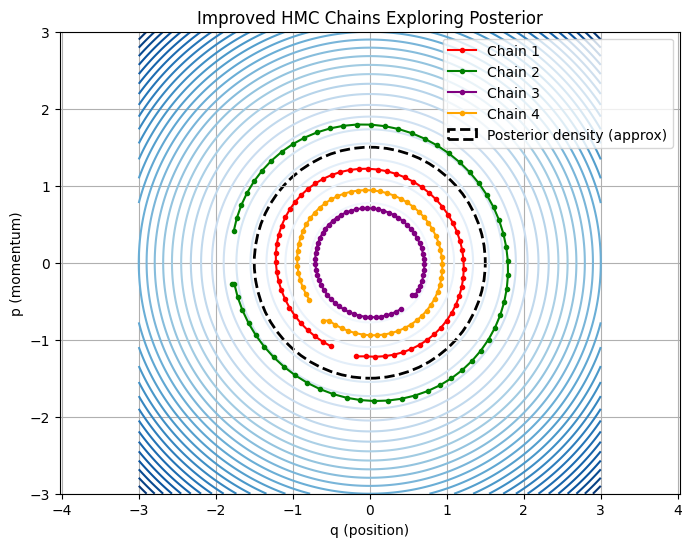

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Define a simple quadratic potential energy function (posterior)
def U(q):
    return 0.5 * q**2

def grad_U(q):
    return q

def K(p):
    return 0.5 * p**2

def H(q, p):
    return U(q) + K(p)

# Leapfrog integrator
def leapfrog(q, p, step_size, n_steps):
    p = p - 0.5 * step_size * grad_U(q)
    trajectory = [(q, p)]
    for _ in range(n_steps):
        q = q + step_size * p
        if _ != n_steps - 1:
            p = p - step_size * grad_U(q)
        trajectory.append((q, p))
    p = p - 0.5 * step_size * grad_U(q)
    return q, p, trajectory

# HMC transition
def hmc_transition(q_current, step_size, n_steps):
    p_current = np.random.normal()
    q_new, p_new, trajectory = leapfrog(q_current, p_current, step_size, n_steps)
    current_H = H(q_current, p_current)
    new_H = H(q_new, p_new)
    if np.random.rand() < np.exp(current_H - new_H):
        return q_new, trajectory
    else:
        return q_current, trajectory

# Generate chains
def generate_chains(n_chains, step_size, n_steps):
    chains = []
    for i in range(n_chains):
        q_start = np.random.uniform(-2, 2)
        _, traj = hmc_transition(q_start, step_size, n_steps)
        chains.append(np.array(traj))
    return chains

# Plotting function
def plot_chains(chains):
    q_vals = np.linspace(-3, 3, 200)
    p_vals = np.linspace(-3, 3, 200)
    Q, P = np.meshgrid(q_vals, p_vals)
    H_vals = H(Q, P)

    plt.figure(figsize=(8, 6))
    contour = plt.contour(Q, P, H_vals, levels=30, cmap="Blues")

    colors = ["red", "green", "purple", "orange"]
    for i, chain in enumerate(chains):
        plt.plot(chain[:, 0], chain[:, 1], marker='o', markersize=3, label=f"Chain {i+1}", color=colors[i])
    
    posterior_boundary = plt.Circle((0, 0), 1.5, color='black', linestyle='--', fill=False, linewidth=2, label='Posterior density (approx)')
    plt.gca().add_patch(posterior_boundary)

    plt.xlabel("q (position)")
    plt.ylabel("p (momentum)")
    plt.title("Improved HMC Chains Exploring Posterior")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.show()

# Generate and plot chains
chains = generate_chains(n_chains=4, step_size=0.1, n_steps=60)
plot_chains(chains)


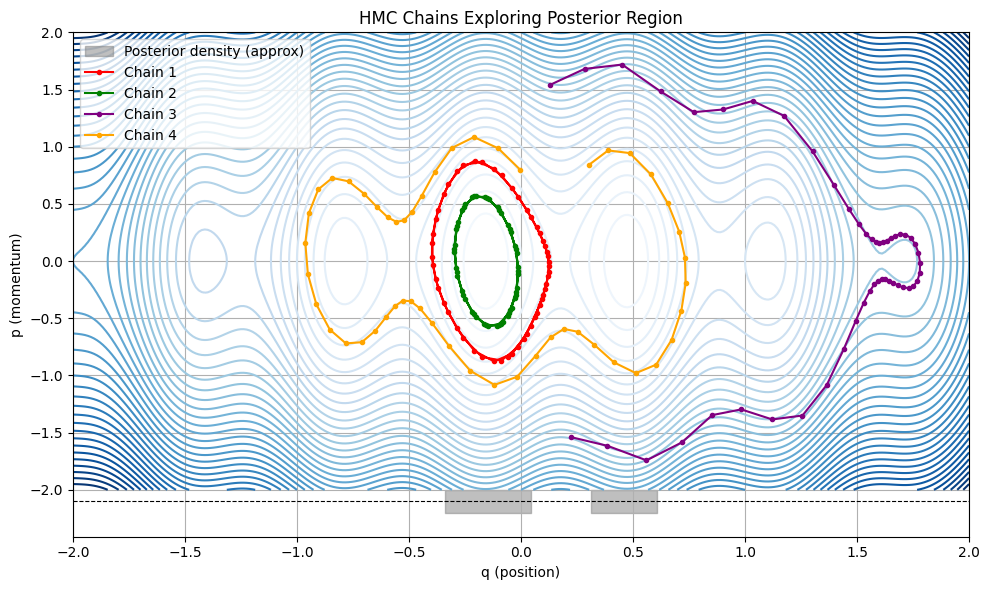

In [20]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility

# Updated potential energy function with a clear mode near q = 0
def U(q):
    return 0.5 * q**2 + 0.2 * np.sin(3 * np.pi * q)

def grad_U(q):
    return q + 0.6 * np.pi * np.cos(3 * np.pi * q)

def K(p):
    return 0.5 * p**2

def H(q, p):
    return U(q) + K(p)

# Leapfrog integrator
def leapfrog(q, p, step_size, n_steps):
    q_new = q
    p_new = p - 0.5 * step_size * grad_U(q_new)
    trajectory = [(q_new, p_new)]

    for _ in range(n_steps):
        q_new += step_size * p_new
        p_new -= step_size * grad_U(q_new)
        trajectory.append((q_new, p_new))

    p_new -= 0.5 * step_size * grad_U(q_new)
    return q_new, p_new, trajectory

# HMC transition with optional starting point
def hmc_transition(q_current, step_size, n_steps):
    p_current = np.random.normal()
    q_new, p_new, trajectory = leapfrog(q_current, p_current, step_size, n_steps)

    current_H = H(q_current, p_current)
    new_H = H(q_new, p_new)

    if np.random.rand() < np.exp(current_H - new_H):
        return q_new, trajectory
    else:
        return q_current, trajectory

# Plot multiple chains and the high-probability posterior region
def plot_multiple_chains(step_size, n_steps, n_chains=4):
    q_vals = np.linspace(-2, 2, 300)
    p_vals = np.linspace(-2, 2, 300)
    Q, P = np.meshgrid(q_vals, p_vals)
    H_vals = H(Q, P)

    # Estimate posterior: use exp(-U(q)) (up to constant)
    posterior_q = np.exp(-U(q_vals))
    posterior_q /= posterior_q.sum()  # Normalize

    plt.figure(figsize=(10, 6))
    plt.contour(Q, P, H_vals, levels=50, cmap="Blues")

    # Show posterior density region at bottom (marginal over q)
    plt.fill_between(q_vals, -2.2, -2.0, where=(posterior_q > 0.005), color='gray', alpha=0.5, label='Posterior density (approx)')

    # Initial positions centered around the mode
    start_points = np.random.normal(loc=0.0, scale=0.2, size=n_chains)

    colors = ['red', 'green', 'purple', 'orange']
    for i in range(n_chains):
        q_start = start_points[i]
        _, trajectory = hmc_transition(q_start, step_size, n_steps)
        trajectory = np.array(trajectory)
        plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', markersize=3, color=colors[i], label=f'Chain {i+1}')
    
    plt.title('HMC Chains Exploring Posterior Region')
    plt.xlabel('q (position)')
    plt.ylabel('p (momentum)')
    plt.axhline(-2.1, color='black', linestyle='--', linewidth=0.8)  # For density reference line
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("hmc_chains_posterior_aligned.png", dpi=300)
    plt.show()

# Run with updated settings
plot_multiple_chains(step_size=0.1, n_steps=50, n_chains=4)


## Modeling the Beta-Binomial Distribution in PyMC

In this section, we will model a **Beta-Binomial** process using PyMC.

### 🎯 Problem Setup

Imagine we conduct an experiment where 10 people are asked whether they prefer pineapple on pizza. Out of the 10 participants, **7 say yes**. We want to estimate the underlying probability $\theta$ that a person says "yes".

We place a **prior distribution** on $\theta$ using a **Beta distribution**, and model the observed data using a **Binomial likelihood**.

---

### 🧾 Model Specification

We use the following hierarchical structure:


- $\theta \sim \text{Beta}(\alpha, \beta)$  
- $y \sim \text{Binomial}(n=10, p=\theta)$


This allows the model to learn the shape parameters of the Beta prior from the data.

---







In [2]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Step 1: Define the model with fixed prior parameters
with pm.Model() as beta_binom_fixed:
    theta = pm.Beta("theta", alpha=2, beta=2)  # Prior
    y_obs = pm.Binomial("y_obs", n=10, p=theta, observed=7)  # Likelihood

    # Step 2: Sample from the posterior
    idata = pm.sample(
    draws=10000,         # Number of posterior samples per chain
    tune=3000,          # Number of warm-up (burn-in) steps
    chains=4,           # Number of parallel MCMC chains
    cores=4,            # Use 4 CPU cores (one per chain)
    target_accept=0.9,  # Higher acceptance rate to reduce divergences
    return_inferencedata=True,
    random_seed=42
    )



WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 3_000 tune and 10_000 draw iterations (12_000 + 40_000 draws total) took 3 seconds.


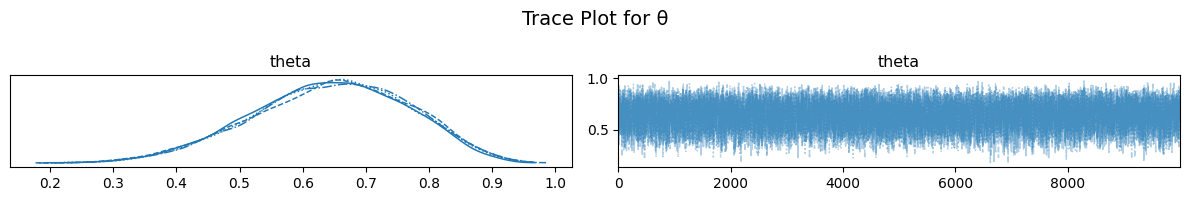

In [3]:
# Step 3: Diagnostics

## 3.1 Trace Plot
az.plot_trace(idata, var_names=["theta"])
plt.suptitle("Trace Plot for θ", fontsize=14)
plt.tight_layout()
plt.savefig("trace_fixed_beta_binom.png", dpi=300)
plt.show()




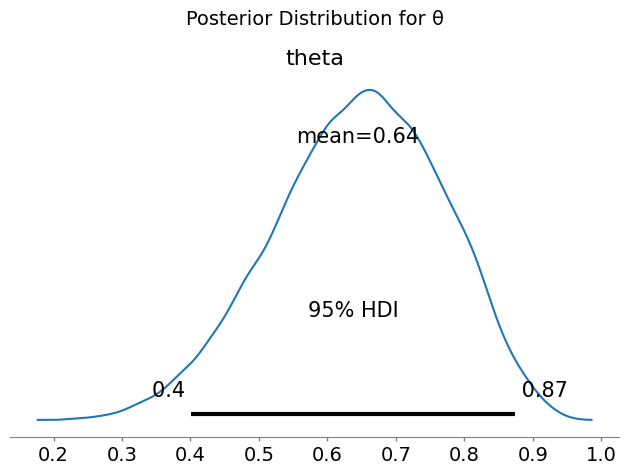

In [4]:
## 3.2 Posterior Plot
az.plot_posterior(idata, var_names=["theta"], hdi_prob=0.95)
plt.suptitle("Posterior Distribution for θ", fontsize=14)
plt.tight_layout()
plt.savefig("posterior_fixed_beta_binom.png", dpi=300)
plt.show()



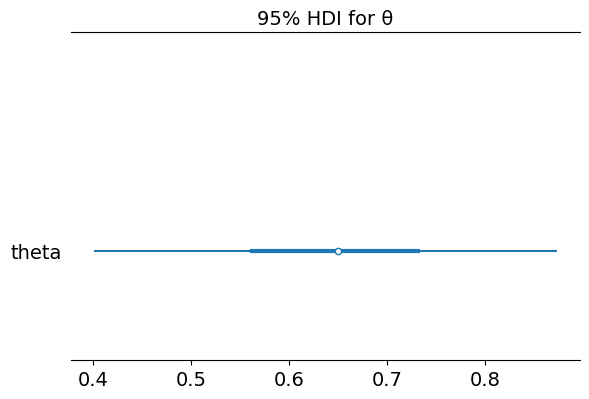

In [5]:
## 3.3 Forest Plot (with HDI)
az.plot_forest(idata, var_names=["theta"], combined=True, hdi_prob=0.95)
plt.title("95% HDI for θ", fontsize=14)
plt.tight_layout()
plt.savefig("forest_fixed_beta_binom.png", dpi=300)
plt.show()



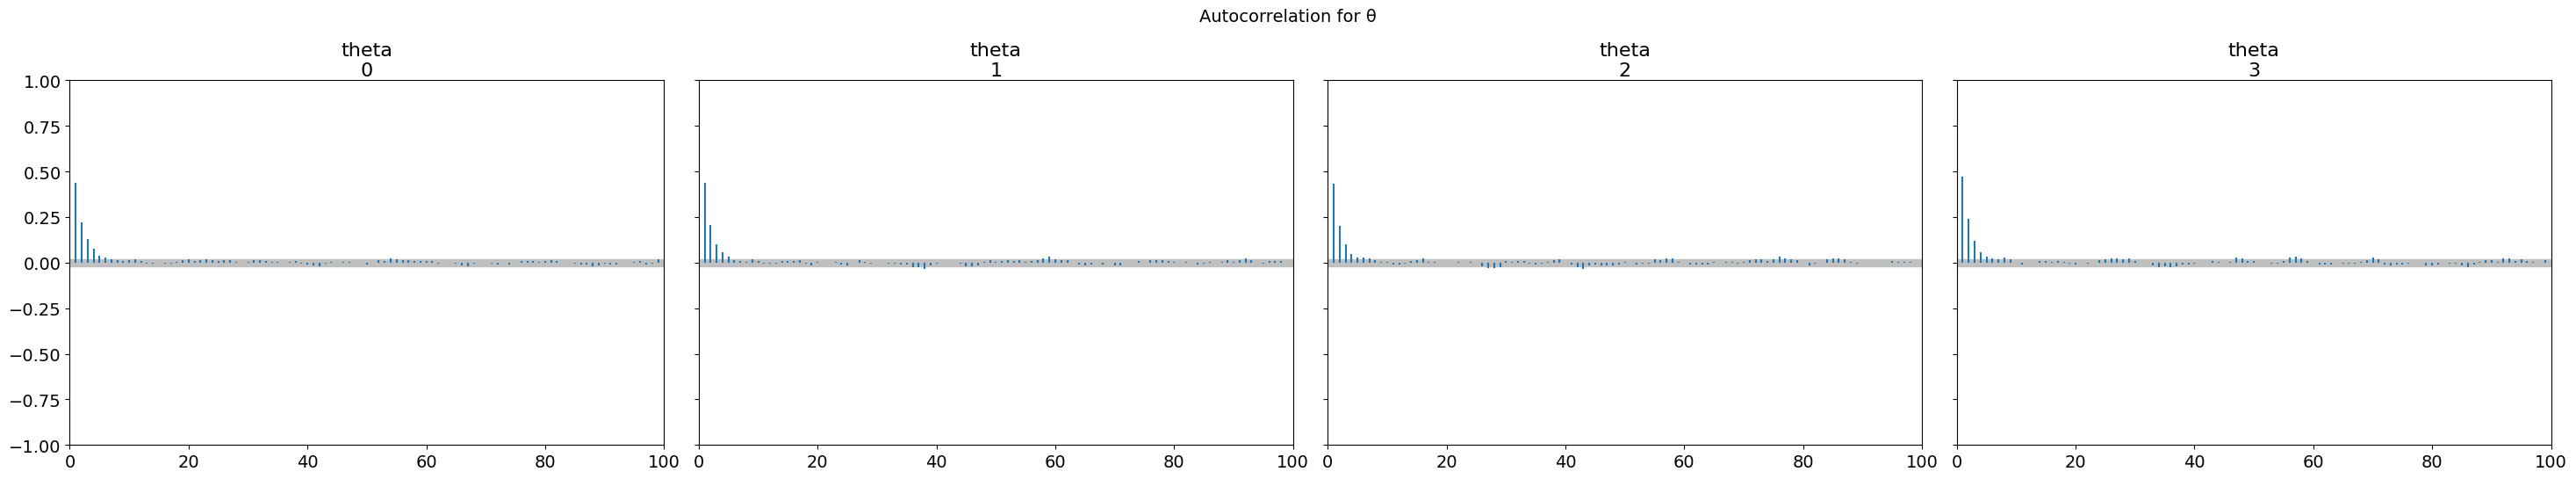

In [6]:
## 3.4 Autocorrelation Plot
az.plot_autocorr(idata, var_names=["theta"])
plt.suptitle("Autocorrelation for θ", fontsize=14)
plt.tight_layout()
plt.savefig("autocorr_fixed_beta_binom.png", dpi=300)
plt.show()



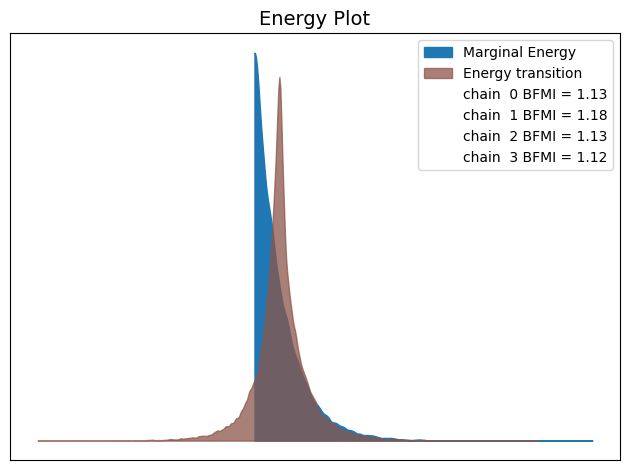

In [7]:
## 3.5 Energy Plot (diagnose divergences/leapfrog issues)
az.plot_energy(idata)
plt.title("Energy Plot", fontsize=14)
plt.tight_layout()
plt.savefig("energy_fixed_beta_binom.png", dpi=300)
plt.show()



In [8]:
# Step 4: Summary Table (R-hat, ESS, HDI, etc.)
summary = az.summary(idata, var_names=["theta"], round_to=3)
print(summary)
summary.to_csv("summary_fixed_beta_binom.csv")

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd   ess_bulk  \
theta  0.644  0.124   0.412    0.866      0.001    0.001  13720.044   

        ess_tail  r_hat  
theta  18477.233    1.0  


## 🔍 Posterior Summary for `theta`

The table below summarizes the posterior distribution of the parameter `theta` using MCMC samples:

| Parameter | Mean | SD   | 3% HDI | 97% HDI | MCSE (Mean) | MCSE (SD) | ESS (Bulk) | ESS (Tail) | R-hat |
|-----------|------|------|--------|---------|--------------|------------|-------------|-------------|--------|
| `theta`   | 0.644 | 0.124 | 0.412  | 0.866   | 0.001        | 0.001      | 13720.044    | 18477.233    | 1.000  |

### 🧠 Interpretation

- **Mean**: The posterior mean of $\theta$ is **0.644**, which reflects the central estimate based on the data.
- **SD**: The standard deviation of the posterior is **0.124**, indicating moderate uncertainty.
- **HDI (3%–97%)**: The 94% Highest Density Interval (HDI) ranges from **0.412 to 0.866**, representing the most credible values for $\theta$.
- **MCSE**: The Monte Carlo Standard Errors are **very small** (0.001), indicating reliable sampling.
- **ESS (Effective Sample Size)**:
  - **Bulk ESS**: 13,720 — indicates that the MCMC chains explored the bulk of the posterior effectively.
  - **Tail ESS**: 18,477 — shows reliable estimation in the distribution’s tails.
- **R-hat**: $\hat{R} = 1.0$ — perfect convergence. All chains mixed well and sampled from the same distribution.

✅ Overall, the diagnostics indicate a **high-quality and converged posterior** for the parameter $\theta$.


## 📈 Bayesian Linear Regression in PyMC

In this section, we will build and analyze a **Bayesian linear regression model** using PyMC.

### 🎯 Objective

We aim to estimate the relationship between a predictor variable `x` and a response variable `y`, while accounting for uncertainty in both the slope and the intercept of the regression line.

---

### 🧾 Model Specification

We assume the following generative model:

- $ \alpha \sim \mathcal{N}(0, 10) $  (intercept)
- $ \beta \sim \mathcal{N}(0, 10) $  (slope)
- $ \sigma \sim \text{HalfNormal}(1) $  (observation noise)
- $ \mu = \alpha + \beta \cdot x $  (linear mean)
- $ y \sim \mathcal{N}(\mu, \sigma) $  (observed outcomes)

This model assumes that the relationship between `x` and `y` is linear, and that `y` is normally distributed around the regression line with standard deviation $\sigma$.

---

### 🔢 Implementation Steps

We will:

1. Simulate or load a dataset
2. Define the linear regression model in PyMC
3. Perform posterior sampling using MCMC
4. Evaluate the model using diagnostic tools (trace plots, posterior, R-hat, ESS)
5. Visualize the posterior predictive regression lines

Let’s begin by simulating the data and specifying the model.


In [9]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Step 1: Simulate data
np.random.seed(42)
n = 100
x = np.linspace(0, 10, n)
true_alpha = 1.5
true_beta = 2.0
true_sigma = 1.0

y = true_alpha + true_beta * x + np.random.normal(0, true_sigma, size=n)

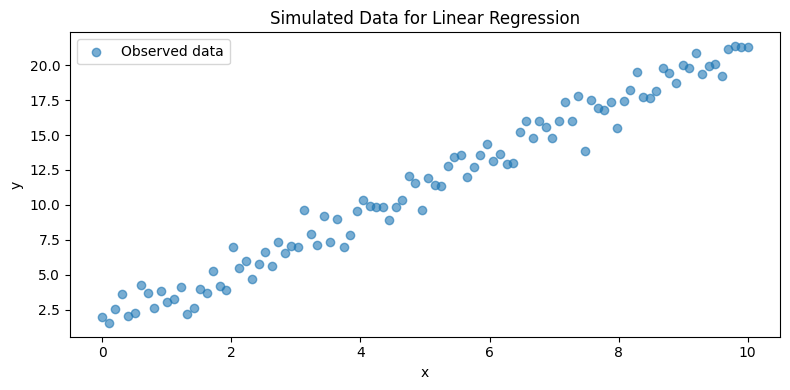

In [10]:
# Step 2: Plot the data
plt.figure(figsize=(8, 4))
plt.scatter(x, y, label='Observed data', alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Simulated Data for Linear Regression")
plt.legend()
plt.tight_layout()
plt.savefig("simulated_data.png", dpi=300)
plt.show()




In [11]:
# Step 3: Define the Bayesian linear regression model
with pm.Model() as linear_model:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=1)

    mu = alpha + beta * x

    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    # Step 4: Sample from the posterior
    idata = pm.sample(
        draws=1000,
        tune=1000,
        chains=4,
        cores=4,
        target_accept=0.9,
        return_inferencedata=True,
        random_seed=42
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


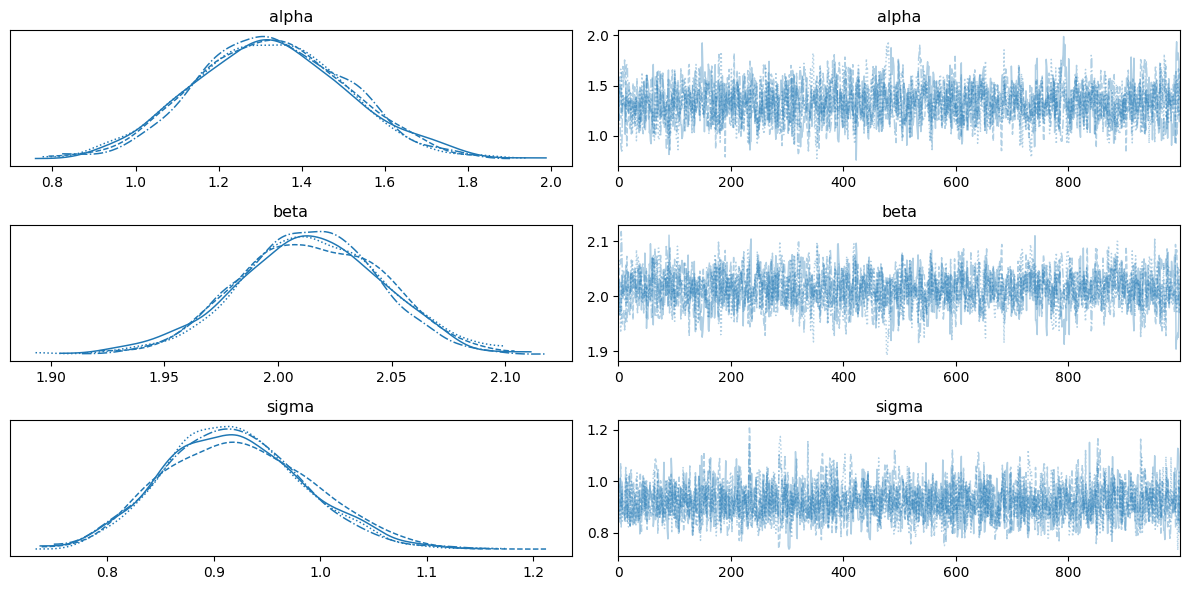

In [12]:
# Trace plot
az.plot_trace(idata, var_names=["alpha", "beta", "sigma"])
plt.tight_layout()
plt.savefig("linear_regression_trace.png", dpi=300)
plt.show()

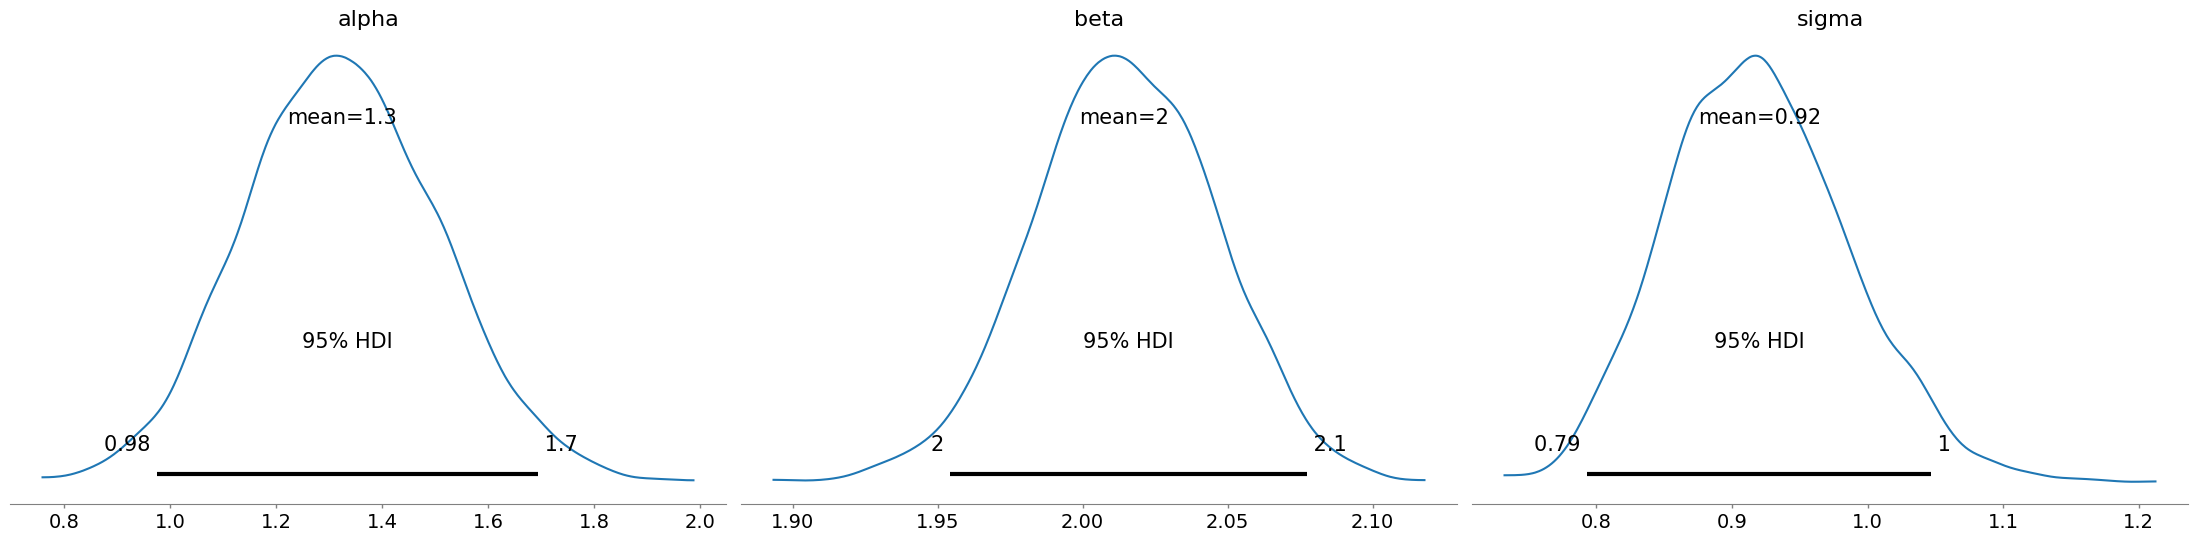

In [13]:
# Posterior plots
az.plot_posterior(idata, var_names=["alpha", "beta", "sigma"], hdi_prob=0.95)
plt.tight_layout()
plt.savefig("linear_regression_posterior.png", dpi=300)
plt.show()

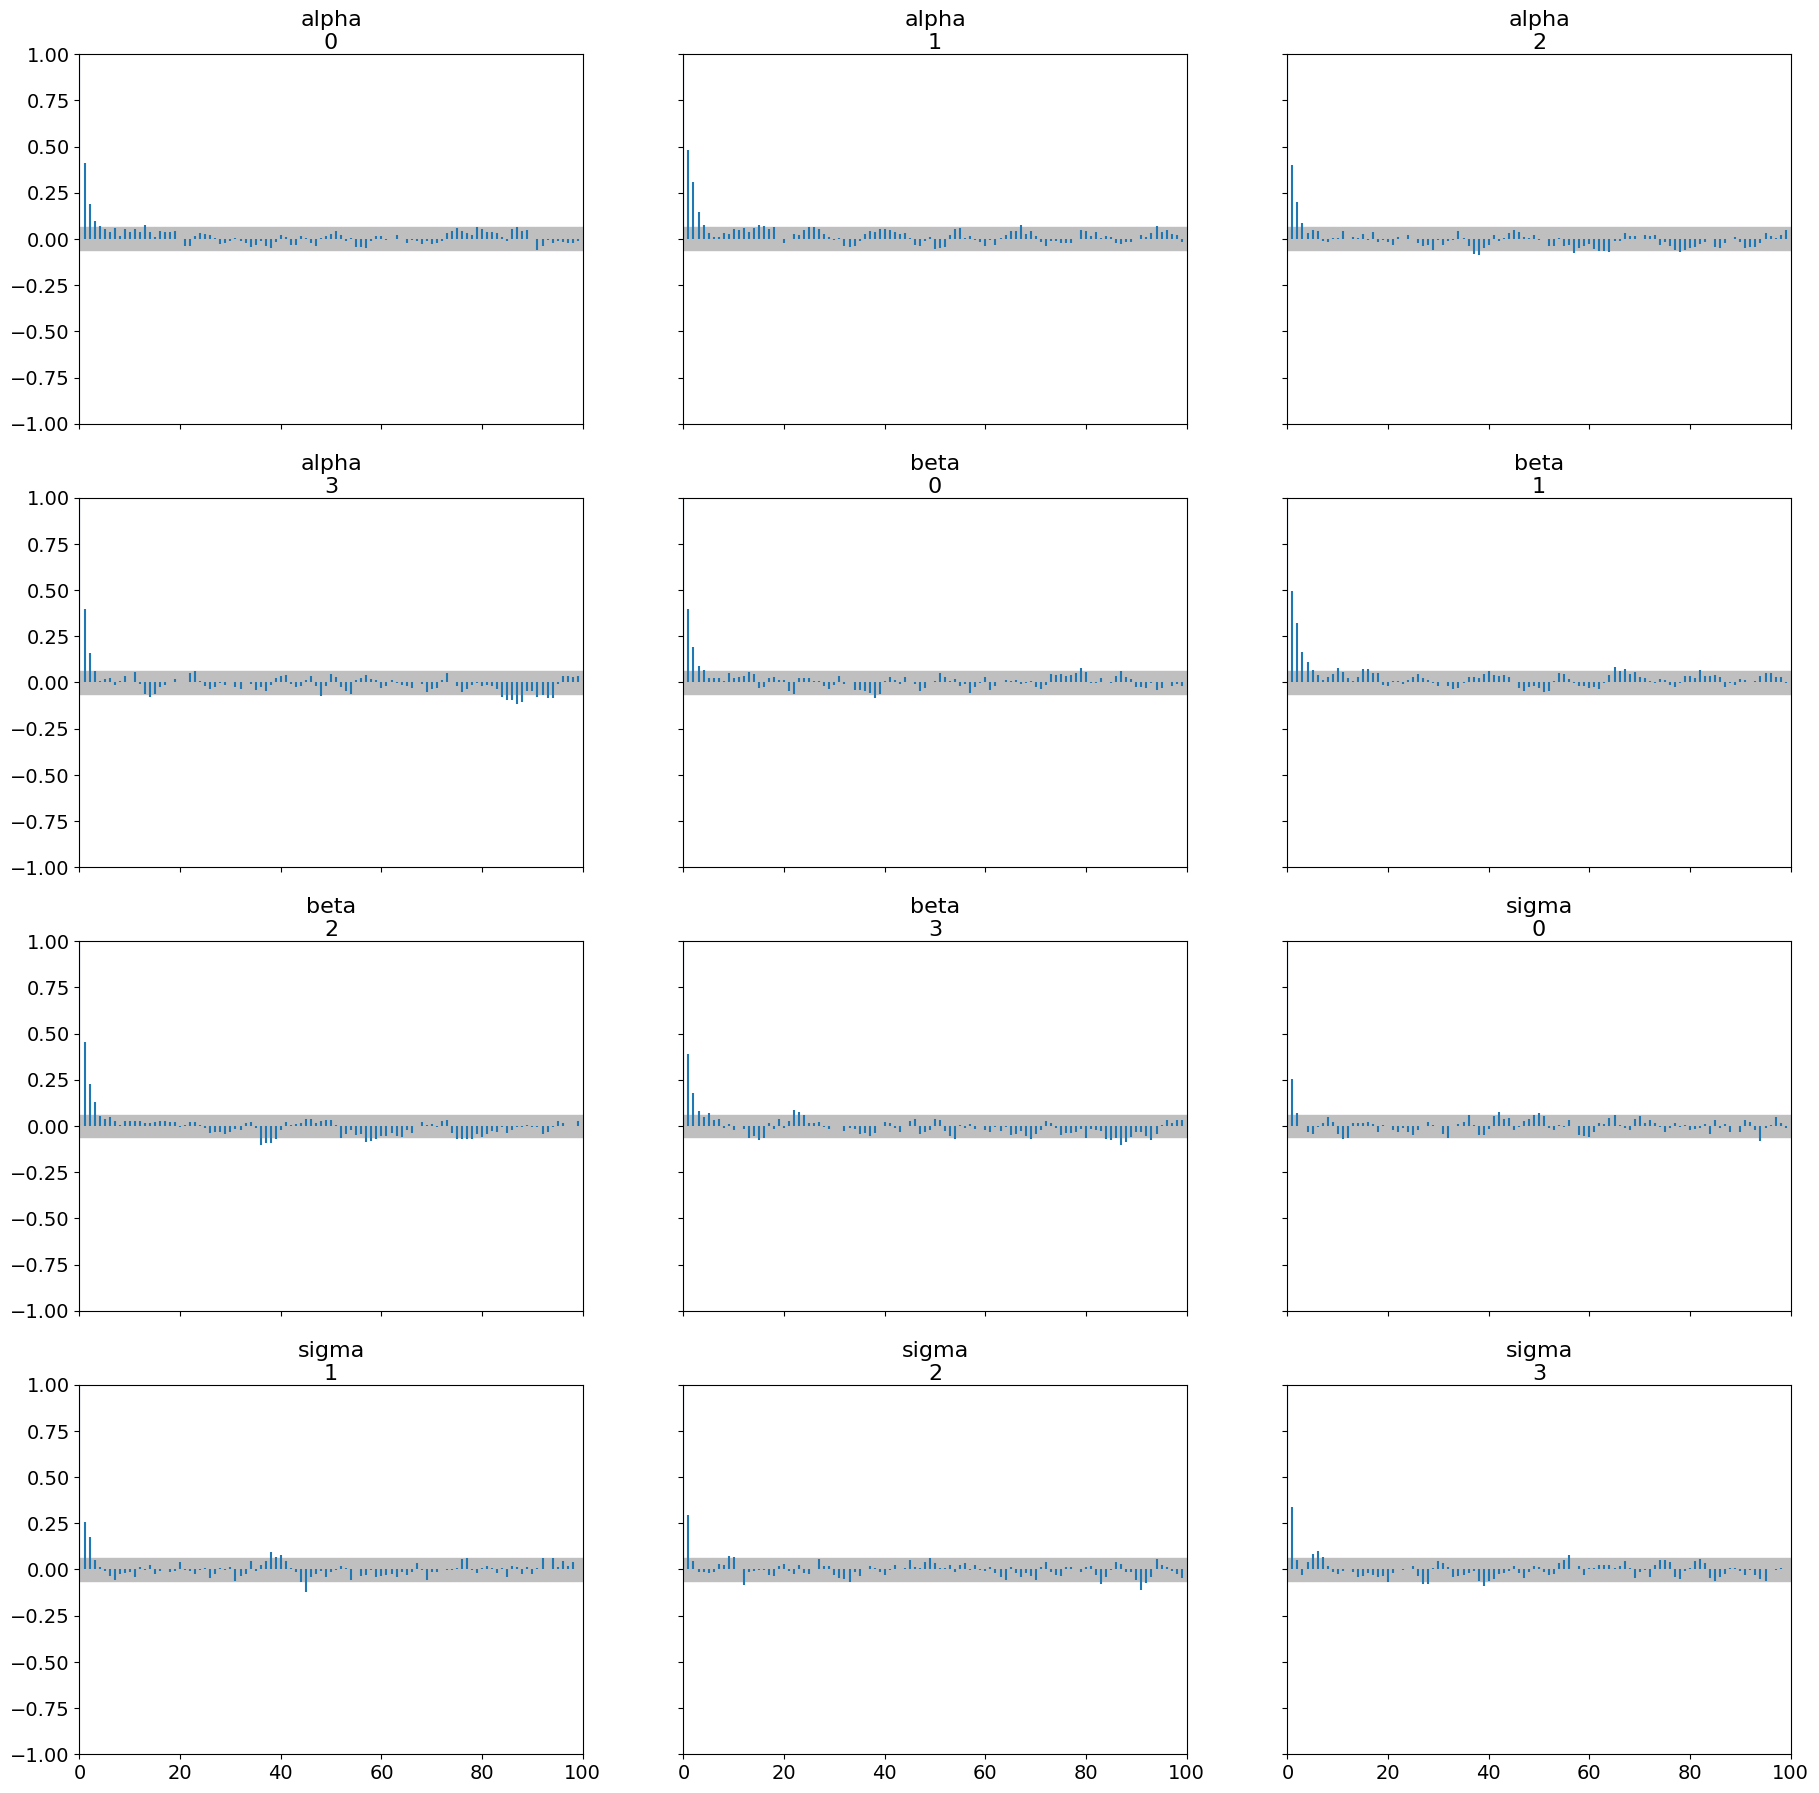

In [14]:
az.plot_autocorr(idata, var_names=["alpha", "beta", "sigma"])
plt.savefig("autocorr_linear_regression.png")


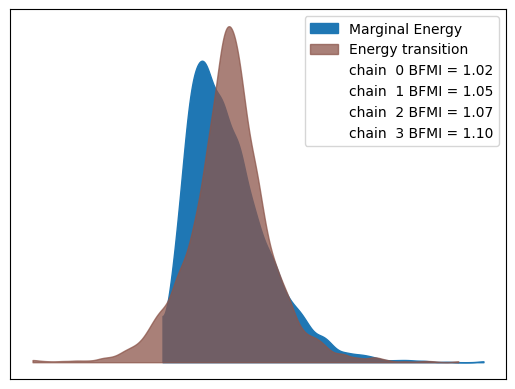

In [15]:
az.plot_energy(idata)
plt.savefig("energy_linear_regression.png")



In [25]:
# Summary table
summary = az.summary(idata, var_names=["alpha", "beta", "sigma"], round_to=3)
print(summary)
summary.to_csv("linear_regression_summary.csv")

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  1.325  0.183   1.010    1.696      0.005    0.004  1278.690  1465.097   
beta   2.014  0.032   1.958    2.076      0.001    0.001  1238.438  1391.586   
sigma  0.920  0.067   0.801    1.047      0.001    0.001  2324.454  1945.853   

       r_hat  
alpha  1.001  
beta   1.001  
sigma  1.002  


## 📊 Posterior Summary: Bayesian Linear Regression

After fitting the Bayesian linear regression model, we obtain the following posterior estimates:

| Parameter | Mean  | SD    | 3% HDI | 97% HDI | MCSE (Mean) | MCSE (SD) | ESS (Bulk) | ESS (Tail) | R-hat |
|-----------|-------|-------|--------|---------|--------------|------------|-------------|-------------|--------|
| `alpha`   | 1.325 | 0.183 | 1.010  | 1.696   | 0.005        | 0.004      | 1278.69      | 1465.10      | 1.001  |
| `beta`    | 2.014 | 0.032 | 1.958  | 2.076   | 0.001        | 0.001      | 1238.44      | 1391.59      | 1.001  |
| `sigma`   | 0.920 | 0.067 | 0.801  | 1.047   | 0.001        | 0.001      | 2324.45      | 1945.85      | 1.002  |

---

### 🧠 Interpretation

- The slope (`beta`) and intercept (`alpha`) are close to the true values used in the simulation.
- The noise (`sigma`) is also well estimated.
- The HDIs represent the 94% highest density intervals — the most credible parameter ranges.

---

### 📏 Diagnostic Metrics

- **Monte Carlo Standard Error (MCSE)** values are very low → estimates are reliable.
- **$\hat{R}$ values are ≈ 1.0** → all chains converged properly.
- **ESS (Effective Sample Size)** is high in both bulk and tail regions, which means posterior summaries (mean, intervals) are robust.

---

### 🔄 Bulk vs. Tail ESS

| Term        | Meaning |
|-------------|---------|
| **ESS Bulk** | Measures how well the sampler explores the **center of the posterior** — affects accuracy of means and variances. |
| **ESS Tail** | Measures sampling quality in the **tails of the distribution** — affects accuracy of HDIs and quantiles. |

✅ Both are high → posterior statistics and intervals are trustworthy.

---

## 🔁 Autocorrelation Plot

Autocorrelation measures the similarity between successive samples. If the autocorrelation is high, the sampler is not exploring the posterior efficiently.

In a well-mixed MCMC:

- Lag-0 should be 1 (by definition)
- Lags beyond 0 should drop quickly to 0

![Autocorrelation](autocorr_linear_regression.png)

✅ In this case, autocorrelation is low — effective sample size is high and mixing is good.

---

## ⚡ Energy Plot

The energy plot helps detect **divergences** and **inefficiencies** in the NUTS sampler.

- Ideally, the distribution of energies should be unimodal and smooth.
- Divergences or energy gaps may indicate that reparameterization is needed or `target_accept` should be increased.

![Energy Plot](energy_linear_regression.png)

✅ This plot shows smooth energy behavior with **no divergent transitions** → good geometry and tuning.

---

## ✅ Conclusion

All convergence and sampling diagnostics (trace, R-hat, ESS, autocorrelation, energy) indicate that the posterior results are valid and stable.

The model has recovered the true parameters effectively and provides meaningful uncertainty quantification.
